Lambda School Data Science

*Unit 4, Sprint 3, Module 1*

---


# Recurrent Neural Networks (RNNs) and Long Short Term Memory (LSTM) (Prepare)

<img src="https://media.giphy.com/media/l2JJu8U8SoHhQEnoQ/giphy.gif" width=480 height=356>
<br></br>
<br></br>

## Learning Objectives
- <a href="#p1">Part 1: </a>Describe Neural Networks used for modeling sequences
- <a href="#p2">Part 2: </a>Apply a LSTM to a text generation problem using Keras

## Overview

> "Yesterday's just a memory - tomorrow is never what it's supposed to be." -- Bob Dylan

Wish you could save [Time In A Bottle](https://www.youtube.com/watch?v=AnWWj6xOleY)? With statistics you can do the next best thing - understand how data varies over time (or any sequential order), and use the order/time dimension predictively.

A sequence is just any enumerated collection - order counts, and repetition is allowed. Python lists are a good elemental example - `[1, 2, 2, -1]` is a valid list, and is different from `[1, 2, -1, 2]`. The data structures we tend to use (e.g. NumPy arrays) are often built on this fundamental structure.

A time series is data where you have not just the order but some actual continuous marker for where they lie "in time" - this could be a date, a timestamp, [Unix time](https://en.wikipedia.org/wiki/Unix_time), or something else. All time series are also sequences, and for some techniques you may just consider their order and not "how far apart" the entries are (if you have particularly consistent data collected at regular intervals it may not matter).

# Neural Networks for Sequences (Learn)

## Overview

There's plenty more to "traditional" time series, but the latest and greatest technique for sequence data is recurrent neural networks. A recurrence relation in math is an equation that uses recursion to define a sequence - a famous example is the Fibonacci numbers:

$F_n = F_{n-1} + F_{n-2}$

For formal math you also need a base case $F_0=1, F_1=1$, and then the rest builds from there. But for neural networks what we're really talking about are loops:

![Recurrent neural network](https://upload.wikimedia.org/wikipedia/commons/b/b5/Recurrent_neural_network_unfold.svg)

The hidden layers have edges (output) going back to their own input - this loop means that for any time `t` the training is at least partly based on the output from time `t-1`. The entire network is being represented on the left, and you can unfold the network explicitly to see how it behaves at any given `t`.

Different units can have this "loop", but a particularly successful one is the long short-term memory unit (LSTM):

![Long short-term memory unit](https://upload.wikimedia.org/wikipedia/commons/thumb/6/63/Long_Short-Term_Memory.svg/1024px-Long_Short-Term_Memory.svg.png)

There's a lot going on here - in a nutshell, the calculus still works out and backpropagation can still be implemented. The advantage (ane namesake) of LSTM is that it can generally put more weight on recent (short-term) events while not completely losing older (long-term) information.

After enough iterations, a typical neural network will start calculating prior gradients that are so small they effectively become zero - this is the [vanishing gradient problem](https://en.wikipedia.org/wiki/Vanishing_gradient_problem), and is what RNN with LSTM addresses. Pay special attention to the $c_t$ parameters and how they pass through the unit to get an intuition for how this problem is solved.

So why are these cool? One particularly compelling application is actually not time series but language modeling - language is inherently ordered data (letters/words go one after another, and the order *matters*). [The Unreasonable Effectiveness of Recurrent Neural Networks](https://karpathy.github.io/2015/05/21/rnn-effectiveness/) is a famous and worth reading blog post on this topic.

For our purposes, let's use TensorFlow and Keras to train RNNs with natural language. Resources:

- https://github.com/keras-team/keras/blob/master/examples/imdb_lstm.py
- https://keras.io/layers/recurrent/#lstm
- http://adventuresinmachinelearning.com/keras-lstm-tutorial/

Note that `tensorflow.contrib` [also has an implementation of RNN/LSTM](https://www.tensorflow.org/tutorials/sequences/recurrent).

## Follow Along

Sequences come in many shapes and forms from stock prices to text. We'll focus on text, because modeling text as a sequence is a strength of Neural Networks. Let's start with a simple classification task using a TensorFlow tutorial. 

### RNN/LSTM Sentiment Classification with Keras

In [1]:
'''
#Trains an LSTM model on the IMDB sentiment classification task.
The dataset is actually too small for LSTM to be of any advantage
compared to simpler, much faster methods such as TF-IDF + LogReg.
**Notes**
- RNNs are tricky. Choice of batch size is important,
choice of loss and optimizer is critical, etc.
Some configurations won't converge.
- LSTM loss decrease patterns during training can be quite different
from what you see with CNNs/MLPs/etc.
'''
from __future__ import print_function

from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.datasets import imdb

max_features = 20000
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
# for preproceesing 
# keep last 80 from the end
# pad with 0s at the end
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

Loading data...
25000 train sequences
25000 test sequences


In [2]:
x_train[0]
#data set is already preprocessed
#each number stands for a specific token

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 19193,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 10311,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 12118,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,

In [3]:
def print_text_from_seq(x):
    '''
    Special tokens
    '''
    INDEX_FROM=3   # word index offset
    word_to_id = imdb.get_word_index()
    word_to_id = {k:(v+INDEX_FROM) for k,v in word_to_id.items()}
    word_to_id["<PAD>"] = 0 
    word_to_id["<START>"] = 1
    word_to_id["<UNK>"] = 2
    word_to_id["<UNUSED>"] = 3

    id_to_word = {value:key for key,value in word_to_id.items()}
    print('=================================================')
    print(f'Length = {len(x)}')
    print('=================================================')
    print(' '.join(id_to_word[id] for id in x ))

In [4]:
print_text_from_seq(x_train[0])

Length = 218
<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing an

In [7]:
for i in range(0,6):
    print(x_train[i])
    print_text_from_seq(x_train[i])

[   15   256     4     2     7  3766     5   723    36    71    43   530
   476    26   400   317    46     7     4 12118  1029    13   104    88
     4   381    15   297    98    32  2071    56    26   141     6   194
  7486    18     4   226    22    21   134   476    26   480     5   144
    30  5535    18    51    36    28   224    92    25   104     4   226
    65    16    38  1334    88    12    16   283     5    16  4472   113
   103    32    15    16  5345    19   178    32]
Length = 80
that played the <UNK> of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you think the whole story was so lovely because it was true and was someone's life after all that was shared with us all
[ 125   68    2 6853   15  349  165 4362   98    5    4  228    9   43
    2 1157   1

In [6]:
print('Pad Sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape: ', x_train.shape)
print('x_test shape: ', x_test.shape)

Pad Sequences (samples x time)
x_train shape:  (25000, 80)
x_test shape:  (25000, 80)


In [8]:
x_train[0]

array([   15,   256,     4,     2,     7,  3766,     5,   723,    36,
          71,    43,   530,   476,    26,   400,   317,    46,     7,
           4, 12118,  1029,    13,   104,    88,     4,   381,    15,
         297,    98,    32,  2071,    56,    26,   141,     6,   194,
        7486,    18,     4,   226,    22,    21,   134,   476,    26,
         480,     5,   144,    30,  5535,    18,    51,    36,    28,
         224,    92,    25,   104,     4,   226,    65,    16,    38,
        1334,    88,    12,    16,   283,     5,    16,  4472,   113,
         103,    32,    15,    16,  5345,    19,   178,    32],
      dtype=int32)

In [9]:
print_text_from_seq(x_train[0])

Length = 80
that played the <UNK> of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you think the whole story was so lovely because it was true and was someone's life after all that was shared with us all


In [10]:
y_train #1 is positive and 0 is negative

array([1, 0, 0, ..., 0, 1, 0])

In [11]:
y_train.sum()

12500

In [12]:
# the review labesl are balanced: 50% are positive and 50% are negative
y_train.sum()/len(y_train)

0.5

In [14]:
#Create Model

#MODEL 1
model_fc = Sequential()
model_fc.add(Embedding(max_features, 128)) # Dense vectors with length of 128, remove 0s
model_fc.add(Dense(50, activation = "relu"))
model_fc.add(Dense(50, activation = "relu"))
model_fc.add(Dense(1, activation = "sigmoid"))

#Compile Model
model_fc.compile(loss = "binary_crossentropy", 
                 optimizer = "adam", 
                 metrics = ["accuracy"]
                )
#Model Shape
model_fc.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 128)         2560000   
_________________________________________________________________
dense_3 (Dense)              (None, None, 50)          6450      
_________________________________________________________________
dense_4 (Dense)              (None, None, 50)          2550      
_________________________________________________________________
dense_5 (Dense)              (None, None, 1)           51        
Total params: 2,569,051
Trainable params: 2,569,051
Non-trainable params: 0
_________________________________________________________________


In [15]:
output_fc = model_fc.fit(x_train, 
                         y_train, 
                         batch_size=batch_size, 
                         epochs=5, 
                         validation_data=(x_test, y_test))
#Better than random but not much

Epoch 1/5
782/782 [==============================] - 56s 71ms/step - loss: 0.6804 - accuracy: 0.5529 - val_loss: 0.6792 - val_accuracy: 0.5551
Epoch 2/5
782/782 [==============================] - 57s 73ms/step - loss: 0.6735 - accuracy: 0.5644 - val_loss: 0.6798 - val_accuracy: 0.5554
Epoch 3/5
782/782 [==============================] - 24s 30ms/step - loss: 0.6718 - accuracy: 0.5658 - val_loss: 0.6804 - val_accuracy: 0.5553
Epoch 4/5
782/782 [==============================] - 25s 32ms/step - loss: 0.6709 - accuracy: 0.5671 - val_loss: 0.6818 - val_accuracy: 0.5557
Epoch 5/5
782/782 [==============================] - 25s 32ms/step - loss: 0.6703 - accuracy: 0.5677 - val_loss: 0.6820 - val_accuracy: 0.5548


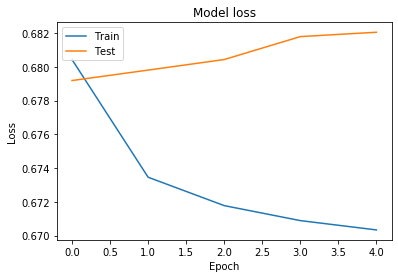

In [16]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(output_fc.history['loss'])
plt.plot(output_fc.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show();

In [18]:
from tensorflow.keras.layers import Dropout

In [21]:
#Create Model

#MODEL 2
model_fc = Sequential()
model_fc.add(Embedding(max_features, 128)) # Dense vectors with length of 128, remove 0s
model_fc.add(Dropout(0.1))
model_fc.add(Dense(50, activation = "relu"))
model_fc.add(Dropout(0.1))
model_fc.add(Dense(50, activation = "relu"))
model_fc.add(Dropout(0.1))
model_fc.add(Dense(1, activation = "sigmoid"))

#Compile Model
model_fc.compile(loss = "binary_crossentropy", 
                 optimizer = "adam", 
                 metrics = ["accuracy"]
                )

In [20]:
output_fc = model_fc.fit(x_train, 
                         y_train, 
                         batch_size=batch_size, 
                         epochs=5, 
                         validation_data=(x_test, y_test))

Epoch 1/5
782/782 [==============================] - 48s 62ms/step - loss: 0.6810 - accuracy: 0.5509 - val_loss: 0.6801 - val_accuracy: 0.5521
Epoch 2/5
782/782 [==============================] - 41s 53ms/step - loss: 0.6741 - accuracy: 0.5637 - val_loss: 0.6806 - val_accuracy: 0.5548
Epoch 3/5
782/782 [==============================] - 41s 53ms/step - loss: 0.6723 - accuracy: 0.5657 - val_loss: 0.6808 - val_accuracy: 0.5559
Epoch 4/5
782/782 [==============================] - 42s 53ms/step - loss: 0.6713 - accuracy: 0.5670 - val_loss: 0.6812 - val_accuracy: 0.5557
Epoch 5/5
782/782 [==============================] - 42s 54ms/step - loss: 0.6707 - accuracy: 0.5677 - val_loss: 0.6818 - val_accuracy: 0.5560


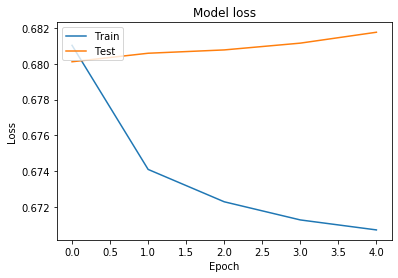

In [22]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(output_fc.history['loss'])
plt.plot(output_fc.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show();

In [23]:
model = Sequential()

model.add(Embedding(max_features, 128))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam', 
              metrics=['accuracy'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 128)         2560000   
_________________________________________________________________
lstm (LSTM)                  (None, 128)               131584    
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 129       
Total params: 2,691,713
Trainable params: 2,691,713
Non-trainable params: 0
_________________________________________________________________


In [24]:
output_lstm = model.fit(x_train, 
                        y_train, 
                        batch_size=batch_size, 
                        epochs=5, 
                        validation_data=(x_test, y_test))

Epoch 1/5
782/782 [==============================] - 128s 163ms/step - loss: 0.4235 - accuracy: 0.8013 - val_loss: 0.3673 - val_accuracy: 0.8377
Epoch 2/5
782/782 [==============================] - 124s 159ms/step - loss: 0.2452 - accuracy: 0.9030 - val_loss: 0.3816 - val_accuracy: 0.8349
Epoch 3/5
782/782 [==============================] - 172s 220ms/step - loss: 0.1541 - accuracy: 0.9409 - val_loss: 0.5025 - val_accuracy: 0.8066
Epoch 4/5
782/782 [==============================] - 199s 255ms/step - loss: 0.0992 - accuracy: 0.9649 - val_loss: 0.5253 - val_accuracy: 0.8176
Epoch 5/5
782/782 [==============================] - 173s 221ms/step - loss: 0.0633 - accuracy: 0.9782 - val_loss: 0.6011 - val_accuracy: 0.8150


In [26]:
from tensorflow.keras.layers import SpatialDropout1D

In [27]:
model = Sequential()

model.add(Embedding(max_features, 128))
model.add(SpatialDropout1D(0.3))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

#Further engineer model
#model.add(LSTM(128, return_sequence=True))
#model.add(SpatialDropout1D(0.3))
#model.add(LSTM(128))

model.compile(loss='binary_crossentropy',
              optimizer='adam', 
              metrics=['accuracy'])

model.summary()

#Spatial Dropout 
# Every observation is a review
# One hot encoded vector gets fed
# Random input -> 20000 to 128
# Spatial dropouts drops out entire dimensions

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, None, 128)         2560000   
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, None, 128)         0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 129       
Total params: 2,691,713
Trainable params: 2,691,713
Non-trainable params: 0
_________________________________________________________________


In [28]:
output_lstm = model.fit(x_train, 
                        y_train, 
                        batch_size=batch_size, 
                        epochs=5, 
                        validation_data=(x_test, y_test))

Epoch 1/5
782/782 [==============================] - 210s 269ms/step - loss: 0.4254 - accuracy: 0.7984 - val_loss: 0.3883 - val_accuracy: 0.8327
Epoch 2/5
782/782 [==============================] - 182s 233ms/step - loss: 0.2616 - accuracy: 0.8955 - val_loss: 0.4056 - val_accuracy: 0.8384
Epoch 3/5
782/782 [==============================] - 128s 163ms/step - loss: 0.1780 - accuracy: 0.9322 - val_loss: 0.4410 - val_accuracy: 0.8260
Epoch 4/5
782/782 [==============================] - 126s 161ms/step - loss: 0.1184 - accuracy: 0.9555 - val_loss: 0.4660 - val_accuracy: 0.8238
Epoch 5/5
782/782 [==============================] - 118s 151ms/step - loss: 0.0849 - accuracy: 0.9703 - val_loss: 0.8364 - val_accuracy: 0.8146


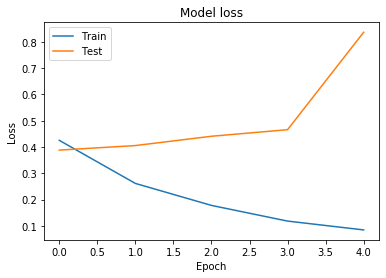

In [29]:
# Plot training & validation loss values
plt.plot(output_lstm.history['loss'])
plt.plot(output_lstm.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show();

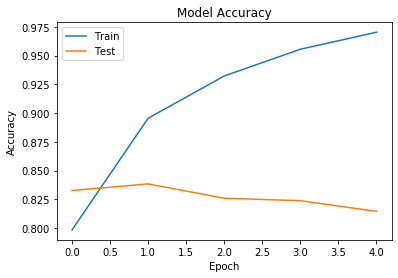

In [30]:
# Plot training & validation loss values
plt.plot(output_lstm.history['accuracy'])
plt.plot(output_lstm.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show();

In [32]:
model = Sequential()

model.add(Embedding(max_features, 128))
model.add(SpatialDropout1D(0.3))
model.add(LSTM(128, return_sequences=True))
model.add(SpatialDropout1D(0.3))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy',
              optimizer='adam', 
              metrics=['accuracy'])

model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, None, 128)         2560000   
_________________________________________________________________
spatial_dropout1d_2 (Spatial (None, None, 128)         0         
_________________________________________________________________
lstm_2 (LSTM)                (None, None, 128)         131584    
_________________________________________________________________
spatial_dropout1d_3 (Spatial (None, None, 128)         0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 129       
Total params: 2,823,297
Trainable params: 2,823,297
Non-trainable params: 0
____________________________________________

In [36]:
from tensorflow import keras

layer_name = 'embedding_8'
test_seq = x_train[0]
intermediate_layer_model = keras.Model(inputs = model.input, 
                                      outputs = model.get_layer(layer_name).output)

intermediate_output = intermediate_layer_model(test_seq)
intermediate_output

<tf.Tensor: shape=(80, 128), dtype=float32, numpy=
array([[-0.03482224,  0.0163383 ,  0.012658  , ...,  0.00188056,
        -0.02377734,  0.00541782],
       [-0.02787789, -0.00964645,  0.04215186, ...,  0.0163408 ,
         0.02589624, -0.04584904],
       [ 0.02386567, -0.02148992,  0.04718458, ..., -0.03490416,
         0.00117211, -0.00734289],
       ...,
       [ 0.04411967,  0.00097131, -0.02169374, ..., -0.02058915,
         0.00021897,  0.02389966],
       [ 0.02123511,  0.04892527, -0.02692886, ..., -0.02161833,
        -0.02850075, -0.03329136],
       [-0.01682049, -0.01233084, -0.02202097, ...,  0.02408805,
        -0.03791084,  0.04037435]], dtype=float32)>

In [37]:
intermediate_output[0]

<tf.Tensor: shape=(128,), dtype=float32, numpy=
array([-0.03482224,  0.0163383 ,  0.012658  , -0.04044656,  0.0493629 ,
       -0.01035767, -0.01675918,  0.02897257, -0.01909447,  0.01348474,
        0.02802862, -0.04543774,  0.04715445,  0.01605148, -0.04395865,
       -0.02191497,  0.03066126,  0.03880015,  0.02748182,  0.03956982,
       -0.00793485,  0.02267082, -0.01664539, -0.01276773, -0.02532179,
        0.03506557,  0.01956043, -0.0016989 , -0.01395348,  0.01566816,
       -0.03243411, -0.00040654, -0.04915874, -0.0218091 ,  0.02022791,
        0.01210137, -0.0384853 ,  0.0115101 ,  0.04537007,  0.01468459,
        0.00739969,  0.01962833,  0.02933675,  0.00678267,  0.02096439,
        0.01030289,  0.02694602,  0.00473393,  0.03265682, -0.01918688,
        0.02474881, -0.00077967, -0.00812379, -0.01704324,  0.00848307,
        0.03643629, -0.01419486, -0.02550806,  0.04648581,  0.00904231,
        0.04152167,  0.04777848,  0.01450321, -0.04171877, -0.00134277,
        0.023002

In [39]:
print_text_from_seq(x_train[0])

Length = 80
that played the <UNK> of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you think the whole story was so lovely because it was true and was someone's life after all that was shared with us all


In [41]:
intermediate_output[3]

<tf.Tensor: shape=(128,), dtype=float32, numpy=
array([ 0.04681227,  0.03885696, -0.04046568, -0.02585478,  0.00260756,
       -0.03996273, -0.01455442,  0.00754929, -0.00339089, -0.01026491,
        0.03895109,  0.00828927,  0.024665  ,  0.01613802,  0.04607118,
        0.03754442, -0.02231139, -0.03831707,  0.00923407, -0.01528221,
        0.03807552,  0.0375412 ,  0.02634502,  0.01915566, -0.03111522,
        0.03626393, -0.0428771 ,  0.02107975,  0.04641135, -0.04726576,
        0.00815426, -0.00070645, -0.01764665,  0.04305358, -0.02632979,
        0.01584414, -0.03898086,  0.03260542, -0.00642874, -0.04327838,
       -0.04828532, -0.03076614,  0.01042702,  0.03860765, -0.00679314,
        0.02215538,  0.04734215,  0.01951921, -0.00490423,  0.04387739,
       -0.04569384, -0.04188403, -0.036471  ,  0.04901931,  0.03626547,
        0.04287792, -0.04367122,  0.02807495,  0.01828755,  0.02112081,
        0.03180582, -0.02451924,  0.02639574,  0.00692681,  0.03594074,
       -0.045071

In [42]:
print_text_from_seq(x_train[3])

Length = 80
<UNK> this once i saw the <UNK> picture ' forget the box office pastiche of braveheart and its like you might even <UNK> the justly famous <UNK> of the wicker man to see a film that is true to scotland this one is probably unique if you maybe <UNK> on it deeply enough you might even re evaluate the power of storytelling and the age old question of whether there are some truths that cannot be told but only experienced


Cannot perform same math as word2vect 

In [ ]:
# first model -> 90%
# combined dataset -> 95%
# smaller model -> 93-94% remove embedding and dropout and then feed dense layers directly into model

#Transfer knowledge from first to second model

In [43]:
pip install transformers

     |████████████████████████████████| 769 kB 5.0 MB/s eta 0:00:01
     |████████████████████████████████| 690 kB 3.9 MB/s eta 0:00:01
     |████████████████████████████████| 883 kB 5.9 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 5.1 MB/s eta 0:00:01
     |████████████████████████████████| 2.1 MB 4.6 MB/s eta 0:00:01
  Created wheel for regex: filename=regex-2020.7.14-cp37-cp37m-macosx_10_9_x86_64.whl size=286542 sha256=fb52ff4b9aa2f95d063dd0bc7e4ebd33f6968d91626143a73a51f9d356c789ed
  Stored in directory: /Users/jisha/Library/Caches/pip/wheels/5b/68/ce/2508b5a5afc13bd96566c62d3ffebea7b401477c2ead3e8cc0
  Created wheel for sacremoses: filename=sacremoses-0.0.43-py3-none-any.whl size=893259 sha256=641f977574ac7f3314f8f90cabe92640e15dc6913674fbca5f555d1281fb5db3
  Stored in directory: /Users/jisha/Library/Caches/pip/wheels/69/09/d1/bf058f7d6fa0ecba2ce7c66be3b8d012beb4bf61a6e0c101c0
Successfully built regex sacremoses
Note: you may need to restart the kernel to use up

In [45]:
from transformers import * 

In [47]:
model_bert = TFBertForSequenceClassification.from_pretrained('bert-base-cased')

model_bert.compile(loss = 'binary_crossentropy',
                   optimizer = 'adam',
                   metrics = ['accuracy']
                  )

model_bert.summary()

Some weights of the model checkpoint at bert-base-cased were not used when initializing TFBertForSequenceClassification: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['dropout_43', 'classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Model: "tf_bert_for_sequence_classification"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bert (TFBertMainLayer)       multiple                  108310272 
_________________________________________________________________
dropout_43 (Dropout)         multiple                  0         
_________________________________________________________________
classifier (Dense)           multiple                  1538      
Total params: 108,311,810
Trainable params: 108,311,810
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# output_bert = model_bert.fit(x_train, 
#                              y_train,
#                              batch_size=batch_size,
#                              epochs=5,
#                              validation_data=(x_test, y_test))

## Challenge

You will be expected to use an Keras LSTM for a classicification task on the *Sprint Challenge*. 

# LSTM Text generation with Keras (Learn)

## Overview

What else can we do with LSTMs? Since we're analyzing the *sequence*, we can do more than classify - we can *generate* text. I'ved pulled some news stories using [newspaper](https://github.com/codelucas/newspaper/).

This example is drawn from the Keras [documentation](https://keras.io/examples/lstm_text_generation/).

In [50]:
from tensorflow.keras.callbacks import LambdaCallback
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.optimizers import RMSprop

import numpy as np
import random
import sys
import os

In [51]:
data_files = os.listdir('./articles')

In [52]:
# Read in Data

data = []

for file in data_files:
    if file[-3:] == 'txt':
        with open(f'./articles/{file}', 'r', encoding='utf-8') as f:
            data.append(f.read())

In [53]:
len(data)

136

In [54]:
data[-1]

'Here are some recent headlines from schools around the country: In Indiana, officials played a segment of a 911 call of a teacher in a panic during the Columbine High School shooting to students. In Ohio, officers fired blank shots during an active-shooter drill. In South Carolina, an officer dressed in black posed as an intruder on an unannounced drill. In Michigan, a school is spending $48 million on a renovation that includes curved hallways and hiding niches, in hopes of protecting students from a mass shooting. In Florida, a police officer arrested two 6-year-old students for misdemeanor battery. In Colorado, teachers received buckets and kitty litter for students to use as toilets in case of a prolonged school lockdown.\n\nMass shootings, meaning incidents with at least two deaths, in schools are horrifying. But it is highly unlikely that a child would ever witness one. Research indicates that some security measures brought in to make schools safer — like realistic shooter train

In [55]:
# Encode Data as Chars

# Gather all text 
# Why? 1. See all possible characters 2. For training / splitting later
text = " ".join(data)

# Unique Characters
chars = list(set(text))

# Lookup Tables
char_int = {c:i for i, c in enumerate(chars)} 
int_char = {i:c for i, c in enumerate(chars)} 

In [56]:
len(chars)

121

In [57]:
int_char

{0: 'm',
 1: 'ﬂ',
 2: 'k',
 3: '!',
 4: '⅔',
 5: 'v',
 6: 'P',
 7: 'ã',
 8: 't',
 9: '‘',
 10: 'p',
 11: 'é',
 12: '©',
 13: "'",
 14: 'd',
 15: 'E',
 16: '&',
 17: '🤔',
 18: 'C',
 19: '|',
 20: 'i',
 21: 'á',
 22: 's',
 23: ')',
 24: '3',
 25: '+',
 26: 'H',
 27: 'Z',
 28: 'O',
 29: '(',
 30: '⭐',
 31: '\xad',
 32: '%',
 33: 'V',
 34: '6',
 35: 'r',
 36: ' ',
 37: 'ö',
 38: '―',
 39: '⅓',
 40: '4',
 41: '7',
 42: '\n',
 43: 'T',
 44: 'A',
 45: 'R',
 46: '…',
 47: '#',
 48: 'Y',
 49: 'L',
 50: '5',
 51: '$',
 52: 'j',
 53: 'è',
 54: 'ê',
 55: '-',
 56: 'S',
 57: 'Q',
 58: '{',
 59: '[',
 60: '"',
 61: ';',
 62: 'z',
 63: '?',
 64: 'K',
 65: '.',
 66: 'J',
 67: 'w',
 68: 'q',
 69: 'ñ',
 70: '/',
 71: '½',
 72: '“',
 73: 'x',
 74: '·',
 75: '👻',
 76: ']',
 77: '*',
 78: '●',
 79: 'W',
 80: 'G',
 81: 'b',
 82: 'M',
 83: '’',
 84: 'o',
 85: '—',
 86: 'í',
 87: 'B',
 88: 'ó',
 89: 'c',
 90: 'X',
 91: 'l',
 92: 'N',
 93: 'h',
 94: '2',
 95: 'a',
 96: '9',
 97: '_',
 98: '×',
 99: 'U',
 100: 

In [58]:
# Create the sequence data

maxlen = 40
step = 5

encoded = [char_int[c] for c in text]

sequences = [] # Each element is 40 chars long
next_char = [] # One element for each sequence

for i in range(0, len(encoded) - maxlen, step):
    
    sequences.append(encoded[i : i + maxlen])
    next_char.append(encoded[i + maxlen])
    
print('sequences: ', len(sequences))


sequences:  178374


In [59]:
sequences[0]

[18,
 84,
 102,
 8,
 35,
 20,
 81,
 105,
 8,
 20,
 102,
 116,
 36,
 89,
 84,
 91,
 105,
 0,
 102,
 20,
 22,
 8,
 42,
 42,
 43,
 93,
 104,
 36,
 26,
 84,
 105,
 22,
 104,
 36,
 20,
 22,
 36,
 84,
 102,
 36]

In [62]:
for i in sequences[0]:
    print(int_char[i])

C
o
n
t
r
i
b
u
t
i
n
g
 
c
o
l
u
m
n
i
s
t




T
h
e
 
H
o
u
s
e
 
i
s
 
o
n
 


In [63]:
# Create x & y

x = np.zeros((len(sequences), maxlen, len(chars)), dtype=np.bool)
y = np.zeros((len(sequences),len(chars)), dtype=np.bool)

for i, sequence in enumerate(sequences):
    for t, char in enumerate(sequence):
        x[i,t,char] = 1
        
    y[i, next_char[i]] = 1
        

In [64]:
next_char[0], int_char[next_char[0]]

(101, 'f')

In [65]:
x.shape

# 178374 # number of characters (including steps)
# Every input is a 40 * 121 matrix
# 40 is the len of the char
# 121 one hot encoded representation of the character

(178374, 40, 121)

In [66]:
y.shape

(178374, 121)

In [67]:
# build the model: a single LSTM

model = Sequential()
model.add(LSTM(128, input_shape=(maxlen, len(chars))))
model.add(Dense(len(chars), activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam')

In [68]:
def sample(preds):
    # helper function to sample an index from a probability array
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / 1
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)

In [69]:
def on_epoch_end(epoch, _):
    # Function invoked at end of each epoch. Prints generated text.
    # Peek at the output of the epoch
    
    print()
    print('----- Generating text after Epoch: %d' % epoch)
    
    start_index = random.randint(0, len(text) - maxlen - 1)
    
    generated = ''
    
    sentence = text[start_index: start_index + maxlen]
    generated += sentence
    
    print('----- Generating with seed: "' + sentence + '"')
    sys.stdout.write(generated)
    
    for i in range(400):
        x_pred = np.zeros((1, maxlen, len(chars)))
        for t, char in enumerate(sentence):
            x_pred[0, t, char_int[char]] = 1
            
        preds = model.predict(x_pred, verbose=0)[0]
        next_index = sample(preds)
        next_char = int_char[next_index]
        
        sentence = sentence[1:] + next_char
        
        sys.stdout.write(next_char)
        sys.stdout.flush()
    print()


print_callback = LambdaCallback(on_epoch_end=on_epoch_end)

In [70]:
# fit the model

model.fit(x, y,
          batch_size=32,
          epochs=10,
          callbacks=[print_callback])

Epoch 1/10
5575/5575 [==============================] - ETA: 0s - loss: 2.5897
----- Generating text after Epoch: 0
----- Generating with seed: "nnel grouping — one tight end, one runni"
nnel grouping — one tight end, one runnititas to ardysthet bud w uth be peatl. Jom uey 1Ns. T?u A 1D Ry OnE hes Fangeras, o memed, Tunt Yo . uu. faisn the the pondere singo fouf cancinnty O. Us. Thes tu Cected. 6the the moig erreztunghy Suly?, “kilen rudped, bokurs dedud cuthorien teet” tar fip chet ouchasted fariatige acs inst winat nis if the his the waws berkimuning ald.

Ashiag thrus ,te wasion.

Am’t -rubl Zo sours a, the Patrton s
5575/5575 [==============================] - 459s 82ms/step - loss: 2.5897
Epoch 2/10
5574/5575 [============================>.] - ETA: 0s - loss: 2.2397
----- Generating text after Epoch: 1
----- Generating with seed: " Louise Wolke on Tuesday, September 3, 2"
 Louise Wolke on Tuesday, September 3, 2ud seise seyar titu shins semanstoned Kurigions fure 1Y firh Snor id o

## Challenge

You will be expected to use a Keras LSTM to generate text on today's assignment. 

# Review

- <a href="#p1">Part 1: </a>Describe Neural Networks used for modeling sequences
    * Sequence Problems:
        - Time Series (like Stock Prices, Weather, etc.)
        - Text Classification
        - Text Generation
        - And many more! :D
    * LSTMs are generally preferred over RNNs for most problems
    * LSTMs are typically a single hidden layer of LSTM type; although, other architectures are possible.
    * Keras has LSTMs/RNN layer types implemented nicely
- <a href="#p2">Part 2: </a>Apply a LSTM to a text generation problem using Keras
    * Shape of input data is very important
    * Can take a while to train
    * You can use it to write movie scripts. :P 

![SimpleRNN](Images/SimpleRNN.png)

![Unrolled](Images/UnrolledRNN.png)

![MultipleLayers](Images/MultipleHiddenLayers.png)

![Problem](Images/Vanishing%20Gradient%20Probelm.png)

![LSTM](Images/LSTM.png)